# Section 1: Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis 
for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled 
wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock 
belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona 
pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come 
up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, 
and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine
situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs 
once the situation gets better all around and stand out from other service providers and make huge profits.They have contracted
a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to 
understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:Which variables 
are significant in predicting the demand for shared bikes.

How well those variables describe the bike demands based on various meteorological surveys and people's styles, the service provider 
firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


 

# Section 2: Business Goal
To model the demand for shared bikes with the available independent variables. It will be used by the management to understand 
how exactly the demands vary with different features.They can accordingly manipulate the business strategy to meet the demand 
levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand 
dynamics of a new market.

Dataset characteristics
=========================================	
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
	
=========================================

# Section 3: Reading and Understanding the Data


In [1183]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [1184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sweetviz as sv
import scipy.stats as stats
import math
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split

#Setting option to diaply maximum rows and columns
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [1185]:
#Checking the version of the libraries
#Panda's version
print(pd.__version__)
#Numpy's version
print(np.__version__)
#Seaborn's version
print(sns.__version__)
#Sweetviz's version
print(sv.__version__)

1.2.4
1.20.1
0.11.1
2.1.3


In [1243]:
df_bike_share = pd.read_csv("day.csv")

In [1244]:
# Check the head of the dataset
df_bike_share.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01/01/2011,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02/01/2011,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03/01/2011,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04/01/2011,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05/01/2011,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1245]:
# Check the descriptive information
df_bike_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [1246]:
df_bike_share.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,20.304399,23.709385,62.759696,12.764568,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,7.512337,8.157586,14.228605,5.192344,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.786250,16.875500,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,20.431653,24.336650,62.583300,12.125325,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.872076,30.430100,72.979150,15.625371,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [1247]:
# Check the shape of df

print(df_bike_share.shape)

(731, 16)


### Finding : 
Dataset has 730 rows and 16 columns.

Except one column, all other are either float or integer type. 

One column is date type.

Looking at the data, there seems to be some fields that are categorical in nature, but in integer/float type.

We will analyse and finalize whether to convert them to categorical or treat as integer.

In [1248]:
df_bike_share.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

In [1249]:
# percentage of missing values in each column

round((df_bike_share.isnull().sum()/len(df_bike_share)*100), 2).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

## Finding
There are no missing / Null values either in columns or rows

In [1250]:
# Checking for duplicates 
df_bike_share.duplicated().sum()

0

In [1251]:
# checking for number of unique values 
df_bike_share.duplicated().nunique()

1

#  Section 4: EXPLORATORY DATA ANALYSIS / DATA CLEANING

In [1252]:
#Creating a copy of the data frame
df_bike_sharing = df_bike_share.copy()

In [1253]:
df_bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01/01/2011,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02/01/2011,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03/01/2011,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04/01/2011,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05/01/2011,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1254]:
'''
Removing redundant & unwanted columns
instant : Its only an index value
dteday :  This has the date, Since we already have seperate columns for 'year' & 'month'.
          hence, we could live without this column.
casual & registered : Both these columns contains the count of bike booked by different categories of customers.
                      Moreover, Count=casual+registered

'''
df_bike_sharing.drop(['instant','dteday'],axis=1,inplace=True)

In [1255]:
df_bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      731 non-null    int64  
 1   yr          731 non-null    int64  
 2   mnth        731 non-null    int64  
 3   holiday     731 non-null    int64  
 4   weekday     731 non-null    int64  
 5   workingday  731 non-null    int64  
 6   weathersit  731 non-null    int64  
 7   temp        731 non-null    float64
 8   atemp       731 non-null    float64
 9   hum         731 non-null    float64
 10  windspeed   731 non-null    float64
 11  casual      731 non-null    int64  
 12  registered  731 non-null    int64  
 13  cnt         731 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 80.1 KB


In [1256]:
# Renaming the variables with meaningful names.
df_bike_sharing.rename(columns={'temp':'temperature_actual','atemp':'temperature_felt','weathersit':'weather_condition',
                                'workingday':'working_day','hum':'humidity','mnth':'month','cnt':'count_rental_bikes',
                                'yr':'year'},inplace=True)

In [1257]:
#Mapping the values of the categorical and numerical variabels with meaningful values.
df_bike_sharing['working_day']=df_bike_sharing['working_day'].map({0:'not_workingday',1:'yes_workingday'})

df_bike_sharing['holiday']=df_bike_sharing['holiday'].map({0:'not_holiday',1:'yes_holiday'})

df_bike_sharing['month'] = df_bike_sharing['month'].map({1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun", 7:"Jul", 8:"Aug", 
                                   9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"})

df_bike_sharing['weather_condition'] = df_bike_sharing['weather_condition'].map({1:"Clear", 2:"Cloudy", 3:"Light Rain", 4:"Heavy Rain"})

df_bike_sharing['season'] = df_bike_sharing['season'].map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})

df_bike_sharing['weekday'] = df_bike_sharing['weekday'].map({1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat',0:'Sun'})
df_bike_sharing['year']=df_bike_sharing['year'].map({0:'2018',1:'2019'})

# Visualising Variables and their relationship with other variables

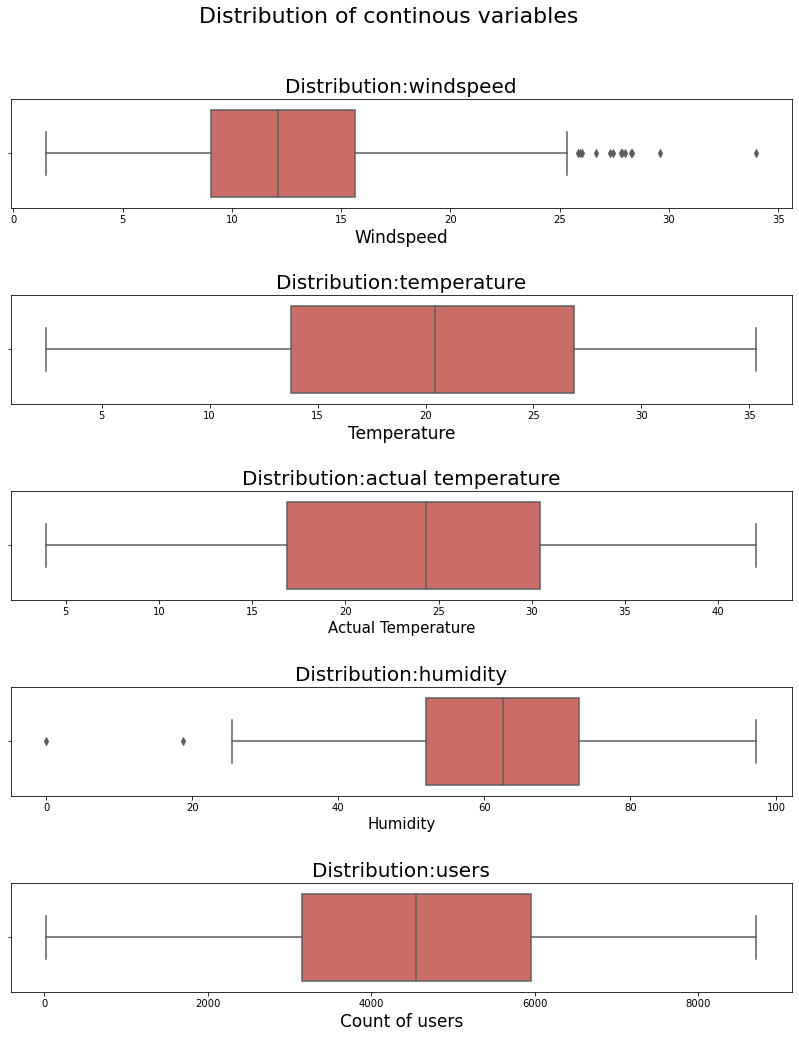

Skewness of windspeed is: 0.6762044188222502
Skewness of humidity is: -0.06638314652191471
Skewness of temperature_felt is: -0.1317241862648642
Skewness of temperature_actual is: -0.05518343997840995
Skewness of count_rental_bikes is: -0.04735278011900183
FINDING:
windspeed and humidity has outliers in their values. We would provide suitable treatment later in the study


In [1258]:
#Plotting the continous variables to understand the distribution and descriptive stats.
def plot_countinous_variables():
    plt.figure(figsize=(14,16))

    plt.suptitle('Distribution of continous variables', fontsize=22)

    plt.subplot(511)
    g = sns.boxplot( x='windspeed', data=df_bike_sharing,palette="hls")
    g.set_xlabel("Windspeed", fontsize=17)
    g.set_title("Distribution:windspeed", fontsize=20)

    plt.subplot(512)
    g1 = sns.boxplot( x="temperature_actual",data=df_bike_sharing, palette = "hls")
    g1.set_xlabel("Temperature", fontsize=17)
    g1.set_title("Distribution:temperature", fontsize=20)

    plt.subplot(513)
    g2 = sns.boxplot(x="temperature_felt", data=df_bike_sharing,palette="hls")
    g2.set_xlabel("Actual Temperature", fontsize=15)
    g2.set_title("Distribution:actual temperature", fontsize=20)

    plt.subplot(514)
    g3 = sns.boxplot(x="humidity", data=df_bike_sharing,palette="hls")
    g3.set_xlabel("Humidity", fontsize=15)
    g3.set_title("Distribution:humidity", fontsize=20)

    plt.subplot(515)
    g4 = sns.boxplot( x='count_rental_bikes', data=df_bike_sharing,palette="hls")
    g4.set_xlabel("Count of users", fontsize=17)
    g4.set_title("Distribution:users", fontsize=20)



    plt.subplots_adjust(hspace = 0.8,top = 0.9)

    plt.show()
plot_countinous_variables()

print('Skewness of windspeed is:',df_bike_sharing['windspeed'].skew())
print('Skewness of humidity is:',df_bike_sharing['humidity'].skew())
print('Skewness of temperature_felt is:',df_bike_sharing['temperature_felt'].skew())
print('Skewness of temperature_actual is:',df_bike_sharing['temperature_actual'].skew())
print('Skewness of count_rental_bikes is:',df_bike_sharing['count_rental_bikes'].skew())

print('FINDING:\nwindspeed and humidity has outliers in their values. We would provide suitable treatment later in the study')

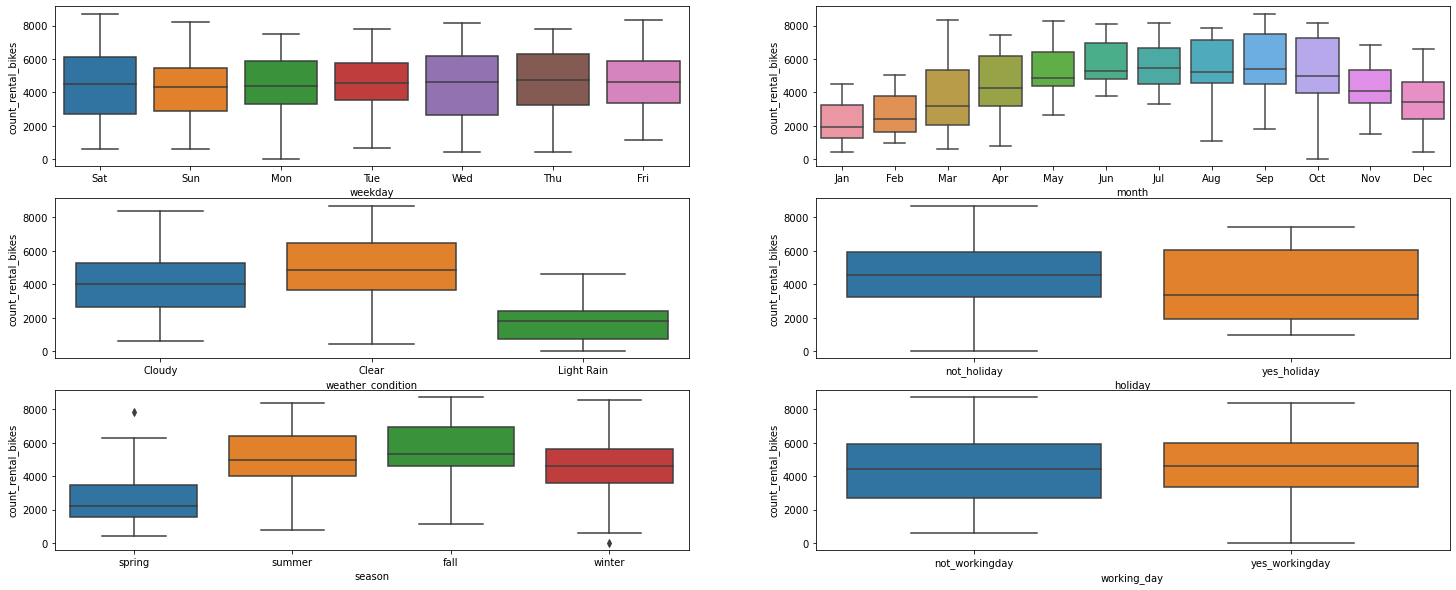

Findings:

weekday:
weekday variable shows very close trend having 13.5%-14.8% of total booking on all days of the week;
having their independent medians between 4000 to 5000 bookings.
This variable can have some or no influence towards the predictor.
I will let the model decide if this needs to be added or not.

month:
Almost 10% of the bike booking were happening in the months 5,6,7,8 & 9
with a median of over 4000 booking per month. This indicates,month has some
trend for bookings and can be a good predictor for the dependent variable.

weather_condition:
Almost 67% of the bike booking were happening during weathers_condition is clean with
a median of close to 5000 booking (for the period of 2 years).Cloudy weather_condition with
30% of total booking.This indicates, weather_condition does show some trend
towards the bike bookings can be a good predictor for the dependent variable.

holiday:
Almost 97% of the bike booking were happening when it is not a holiday
which means this data 

In [1275]:
# Plotting boxplots of all categorical variables W.r.t the target variable 'count_rental_bikes' 
# to see how each of the predictor variable stackup against the target variable.

plt.figure(figsize=(25, 10))
plt.subplot(3,2,1)
sns.boxplot(x = 'weekday', y = 'count_rental_bikes',  data = df_bike_sharing)
plt.subplot(3,2,2)
sns.boxplot(x = 'month', y = 'count_rental_bikes', data = df_bike_sharing)
plt.subplot(3,2,3)
sns.boxplot(x = 'weather_condition', y = 'count_rental_bikes', data = df_bike_sharing)
plt.subplot(3,2,4)
sns.boxplot(x = 'holiday', y = 'count_rental_bikes', data = df_bike_sharing)
plt.subplot(3,2,5)
sns.boxplot(x = 'season', y = 'count_rental_bikes', data = df_bike_sharing)
plt.subplot(3,2,6)
sns.boxplot(x = 'working_day', y = 'count_rental_bikes', data = df_bike_sharing)
plt.show()

print('Findings:')
print()
print('weekday:')
print('weekday variable shows very close trend having 13.5%-14.8% of total booking on all days of the week;\nhaving their independent medians between 4000 to 5000 bookings.\nThis variable can have some or no influence towards the predictor.\nI will let the model decide if this needs to be added or not.')
print()
print('month:')
print('Almost 10% of the bike booking were happening in the months 5,6,7,8 & 9\nwith a median of over 4000 booking per month. This indicates,month has some\ntrend for bookings and can be a good predictor for the dependent variable.')    
print()      
print('weather_condition:')
print('Almost 67% of the bike booking were happening during weathers_condition is clean with\na median of close to 5000 booking (for the period of 2 years).Cloudy weather_condition with\n30% of total booking.This indicates, weather_condition does show some trend\ntowards the bike bookings can be a good predictor for the dependent variable.')
print()
print('holiday:')
print('Almost 97% of the bike booking were happening when it is not a holiday\nwhich means this data is clearly biased.This indicates, holiday cannot be a\ngood predictor for the dependent variable.')
print()
print('season:')
print('Almost 30% of the bike booking were happening in season3 with \na median of over 5000 booking (for the period of 2 years)')
print('This was followed by season2 & season4 with 28% & 25% of total booking.\nThis indicates, season can be a good predictor for the dependent variable') 
print()
print('working_day:')
print('Almost 70% of the bike booking were happening in ‘workingday’ with a median of close to\n5000 booking (for the period of 2 years).This indicates, working_day can be a\ngood predictor for the dependent variable')

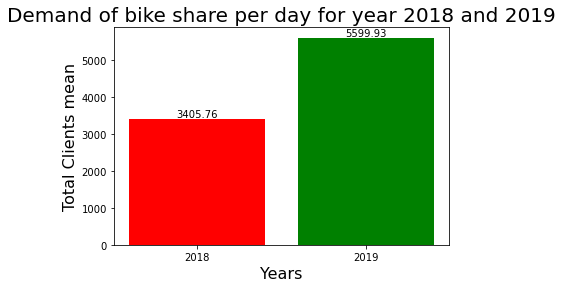

Observation:
There was 64.43 % rise in demand of bike share in year 2019 compared to yesr 2018.
which can be a sign of increasing popularity of the brand.


In [1281]:
y=df_bike_sharing.groupby("year")['count_rental_bikes'].mean()
x=df_bike_sharing.groupby("year")['count_rental_bikes'].mean().index
chart=plt.bar(x,y,color=['Red','green'])
xticks=[0,1]
plt.xticks(xticks,['2018','2019'])
plt.title("Demand of bike share per day for year 2018 and 2019",fontdict={'fontsize':20})
plt.xlabel("Years",fontdict={'fontsize':16})
plt.ylabel("Total Clients mean",fontdict={'fontsize':16})
for rect in chart:
    plt.annotate(round(rect.get_height(),2),
                 xy=(rect.get_x()+rect.get_width()/2,rect.get_height())
                 ,textcoords='data'
                ,va='bottom'
                ,ha='center')
plt.show()

rise_in_demand=round(((5599.93-3405.76)/3405.76)*100,2)

print('Observation:')
print('There was',rise_in_demand,'% rise in demand of bike share in year 2019 compared to yesr 2018.')
print('which can be a sign of increasing popularity of the brand.')

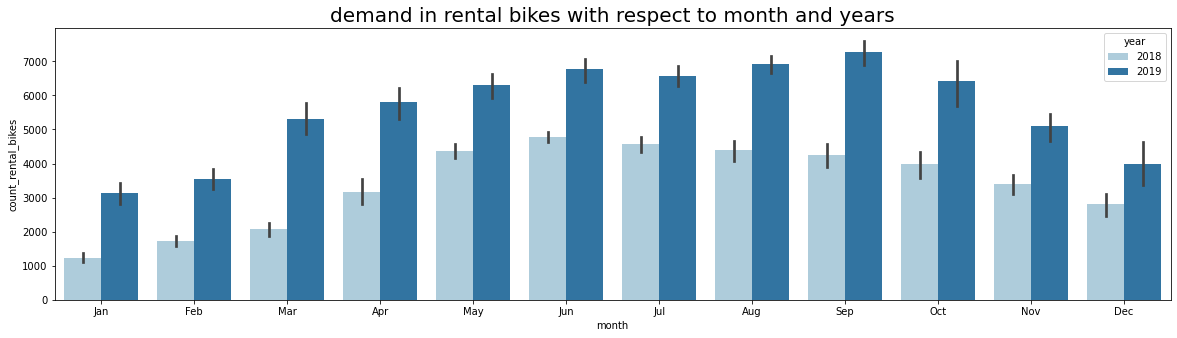

Observation:
Demand of rental bikes peaks from month of march and stay till october.
Year 2018 and 2019 shows similar demand trend.
Demand of bike share has been higher in all months of 2019 compared to 2018.


In [1274]:
plt.figure(figsize=(20,5))
plt.title("demand in rental bikes with respect to month and years",fontdict={'fontsize':20})
sns.barplot('month','count_rental_bikes',hue='year',data=df_bike_sharing,palette='Paired')
plt.show()
print('Observation:')
print('Demand of rental bikes peaks from month of march and stay till october.')
print('Year 2018 and 2019 shows similar demand trend.')
print('Demand of bike share has been higher in all months of 2019 compared to 2018.')

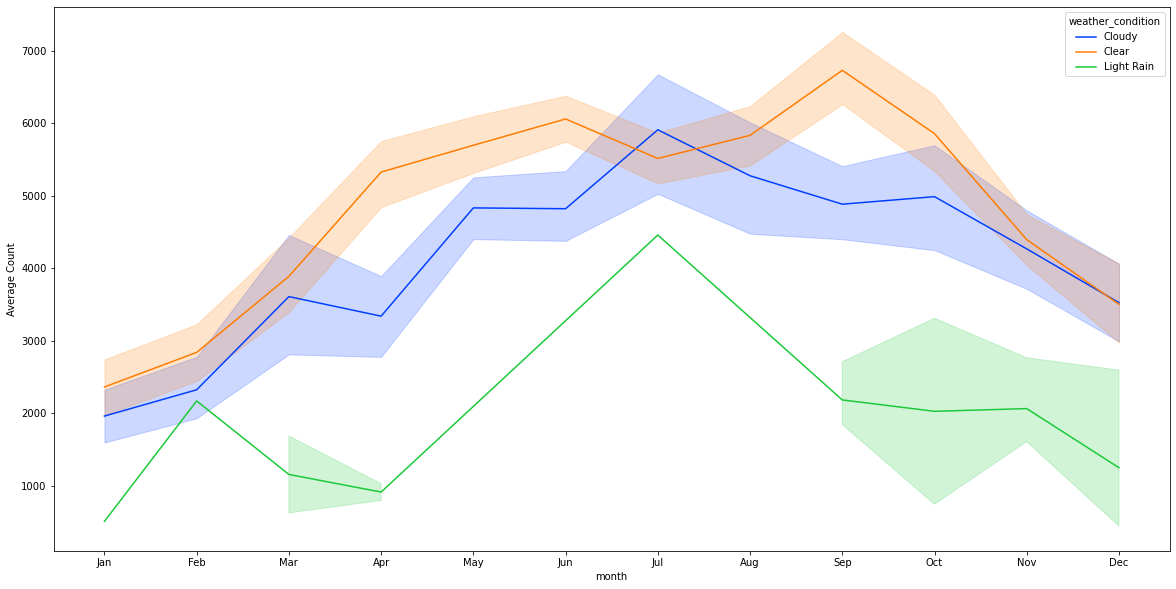

Observation:
Demand of bike share has been higher in clear weather condition in all months but month
july has shown higher demand in cloudy weather.
we suspect higher temperature and low humidity has been the reason for higher demand in 
cloudy weather condition in month of july.It would be interesting to view in terms of
temperature and humidity.
Its quite palpable that light rain or worse is bad for the business as there has been low
demand in comparison to other weather conditions.


In [1288]:
plt.figure(figsize = (20,10))
sns.lineplot(x = 'month', y = 'count_rental_bikes', data = df_bike_sharing, estimator = np.average, hue = 'weather_condition', palette = 'bright')
plt.ylabel('Average Count')
plt.show()

print('Observation:')
print('Demand of bike share has been higher in clear weather condition in all months but month\njuly has shown higher demand in cloudy weather.')
print('we suspect higher temperature and low humidity has been the reason for higher demand in \ncloudy weather condition in month of july.It would be interesting to view in terms of\ntemperature and humidity.')
print('Its quite palpable that light rain or worse is bad for the business as there has been low\ndemand in comparison to other weather conditions.')

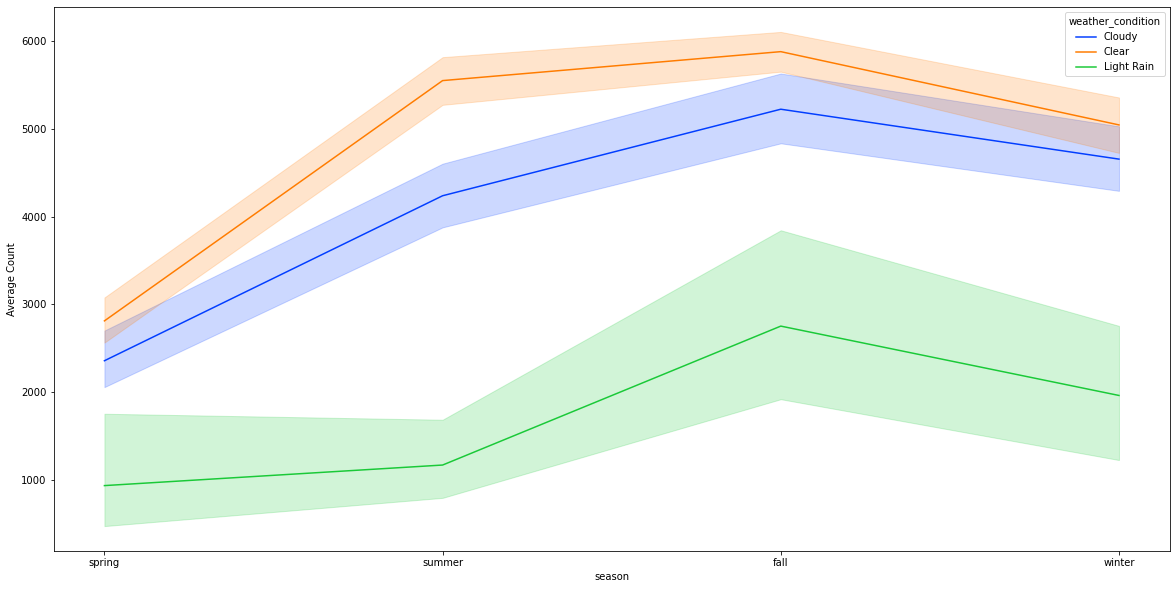

Observation:


In [1289]:
plt.figure(figsize = (20,10))
sns.lineplot(x = 'season', y = 'count_rental_bikes', data = df_bike_sharing, estimator = np.average, hue = 'weather_condition', palette = 'bright')
plt.ylabel('Average Count')
plt.show()

print('Observation:')

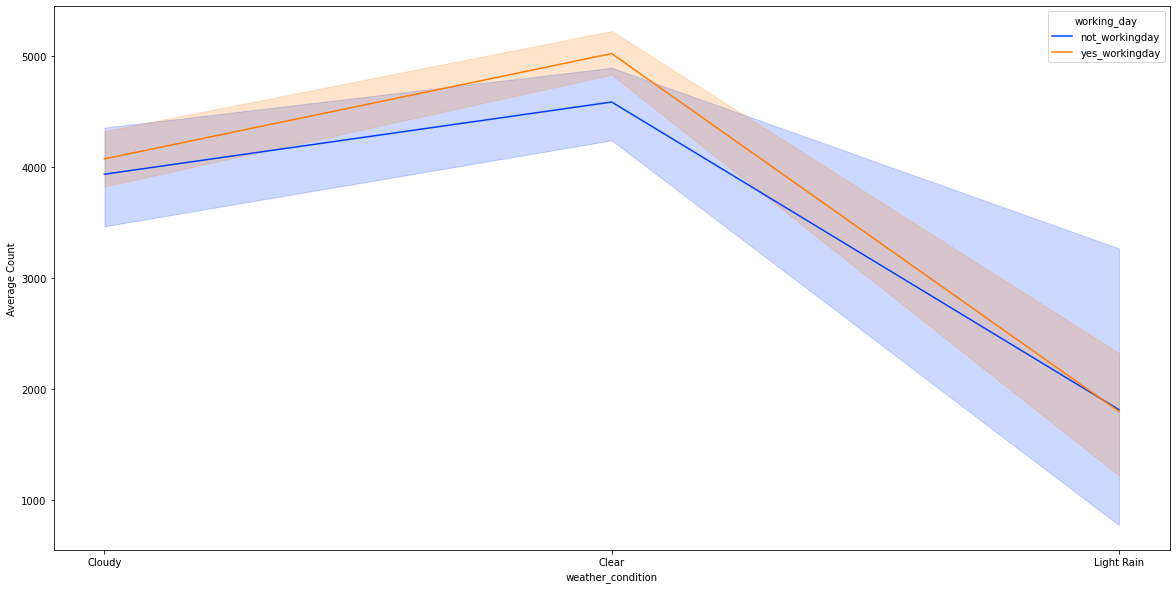

Observation:


In [1291]:
plt.figure(figsize = (20,10))
sns.lineplot(x = 'weather_condition', y = 'count_rental_bikes', data = df_bike_sharing, estimator = np.average, hue = 'working_day', palette = 'bright')
plt.ylabel('Average Count')
plt.show()

print('Observation:')

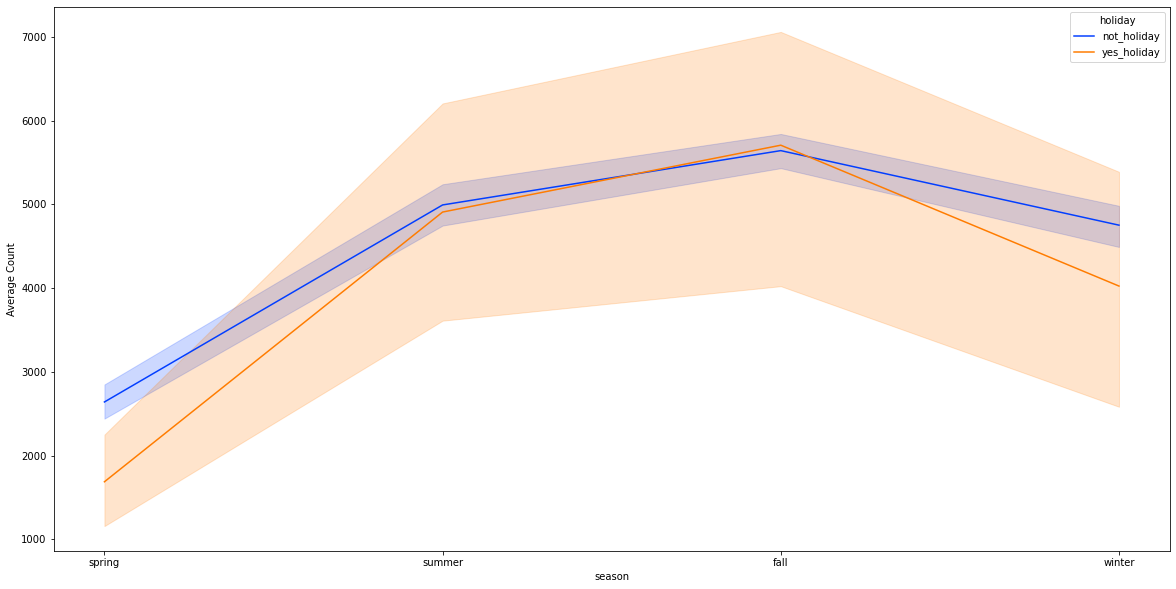

Observation:


In [1292]:
plt.figure(figsize = (20,10))
sns.lineplot(x = 'season', y = 'count_rental_bikes', data = df_bike_sharing, estimator = np.average, hue = 'holiday', palette = 'bright')
plt.ylabel('Average Count')
plt.show()

print('Observation:')

<AxesSubplot:xlabel='weekday', ylabel='count_rental_bikes'>

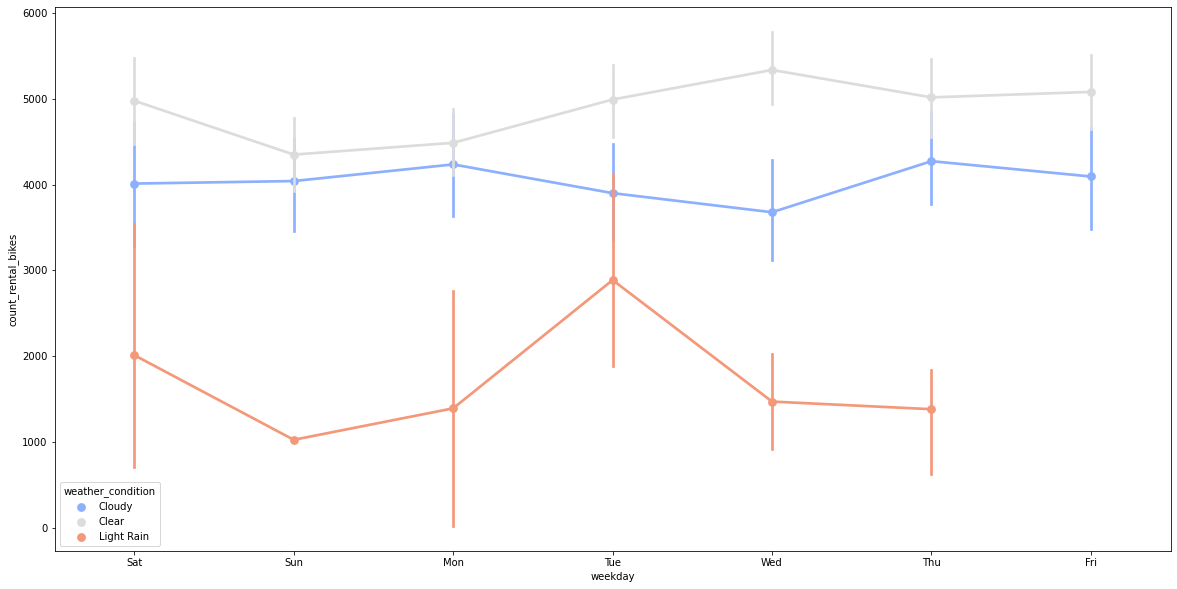

In [1293]:
plt.figure(figsize = (20,10))
sns.pointplot(x = 'weekday', y = 'count_rental_bikes', data = df_bike_sharing, estimator=np.average, hue = 'weather_condition', palette='coolwarm')

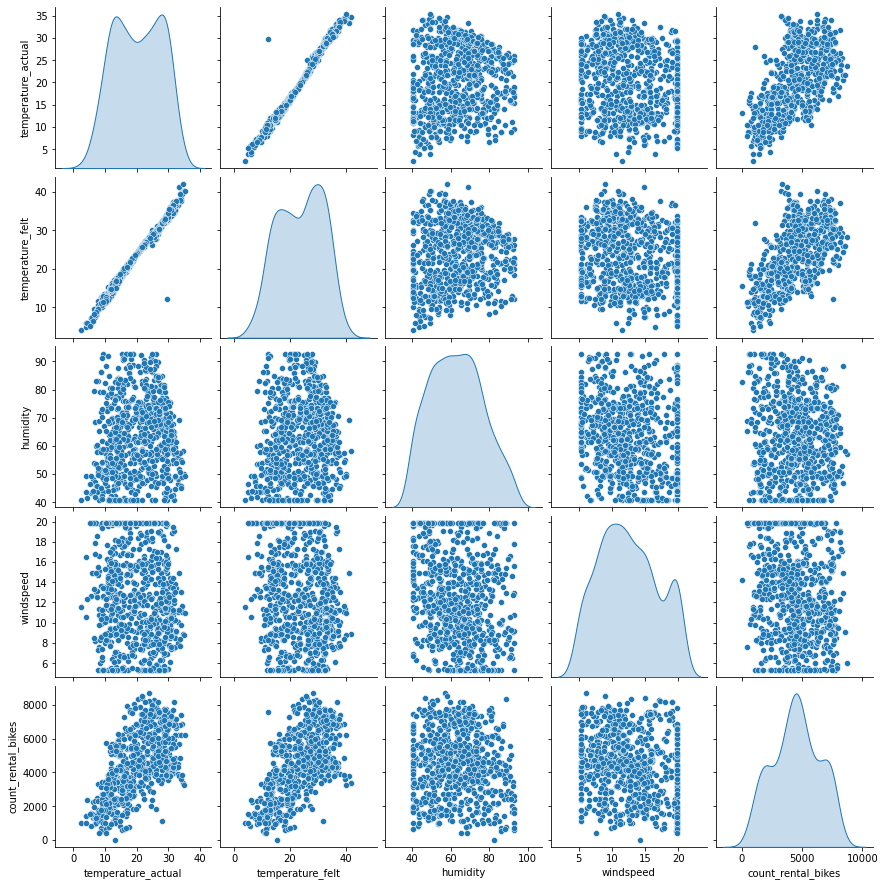

In [1294]:
# Create a new dataframe of only numeric variables:

bike_num_features=df_bike_sharing[[ 'temperature_actual', 'temperature_felt', 'humidity', 'windspeed','count_rental_bikes']]

sns.pairplot(bike_num_features, diag_kind='kde')
plt.show()

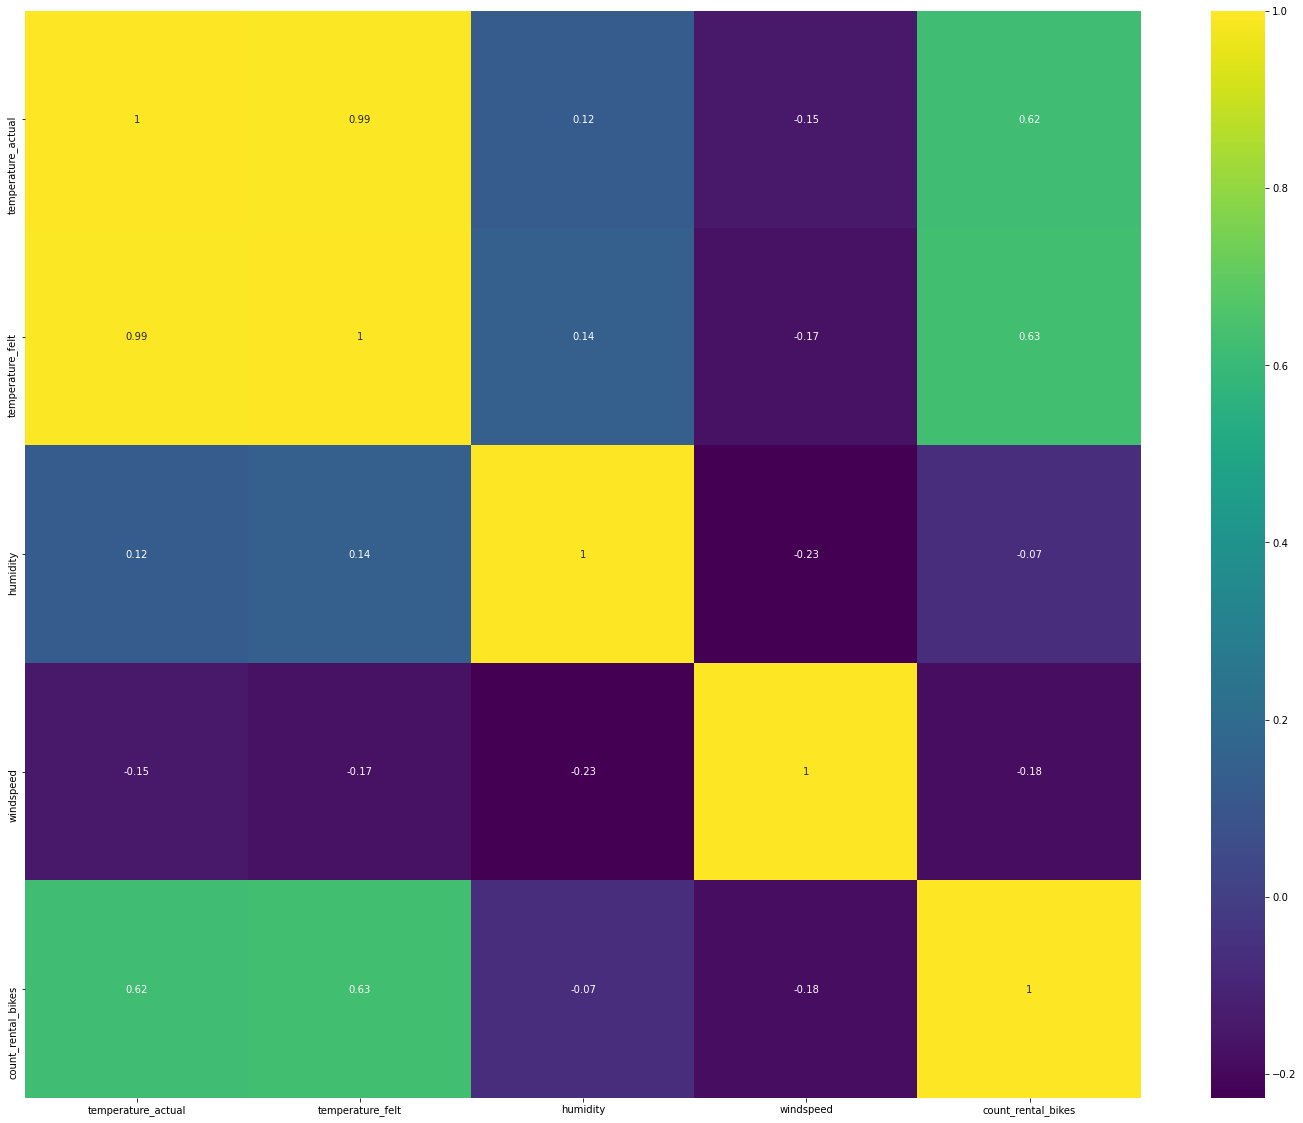

In [1295]:
# Let's check the correlation coefficients to see which variables are highly correlated. Note:
# here we are considering only those variables (dataframe: bike_new) that were chosen for analysis

plt.figure(figsize = (25,20))
sns.heatmap(bike_num_features.corr(), annot = True, cmap="viridis")
plt.show()

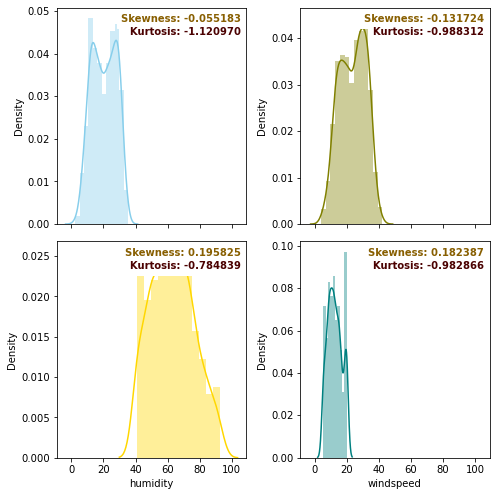

In [1298]:
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.distplot(bike_num_features.iloc[:,0], color="skyblue", ax=axes[0,0])
sns.distplot(bike_num_features.iloc[:,1], color="olive", ax=axes[0,1])

sns.distplot(bike_num_features.iloc[:,2], color="gold", ax=axes[1,0])
sns.distplot(bike_num_features.iloc[:,3], color="teal", ax=axes[1,1])
for i, ax in enumerate(axes.reshape(-1)):
    ax.text(x=0.97, y=0.97, transform=ax.transAxes, s="Skewness: %f" % bike_num_features.iloc[:,i].skew(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:poo brown')
    ax.text(x=0.97, y=0.91, transform=ax.transAxes, s="Kurtosis: %f" % bike_num_features.iloc[:,i].kurt(),\
        fontweight='demibold', fontsize=10, verticalalignment='top', horizontalalignment='right',\
        backgroundcolor='white', color='xkcd:dried blood')
plt.tight_layout()

Skewness of windspeed is: 0.1823868805798719
Skewness of humidity is: 0.1958245796489177
Skewness of temperature_felt is: -0.1317241862648642
Skewness of temperature_actual is: -0.05518343997840995
Skewness of count_rental_bikes is: -0.04735278011900183


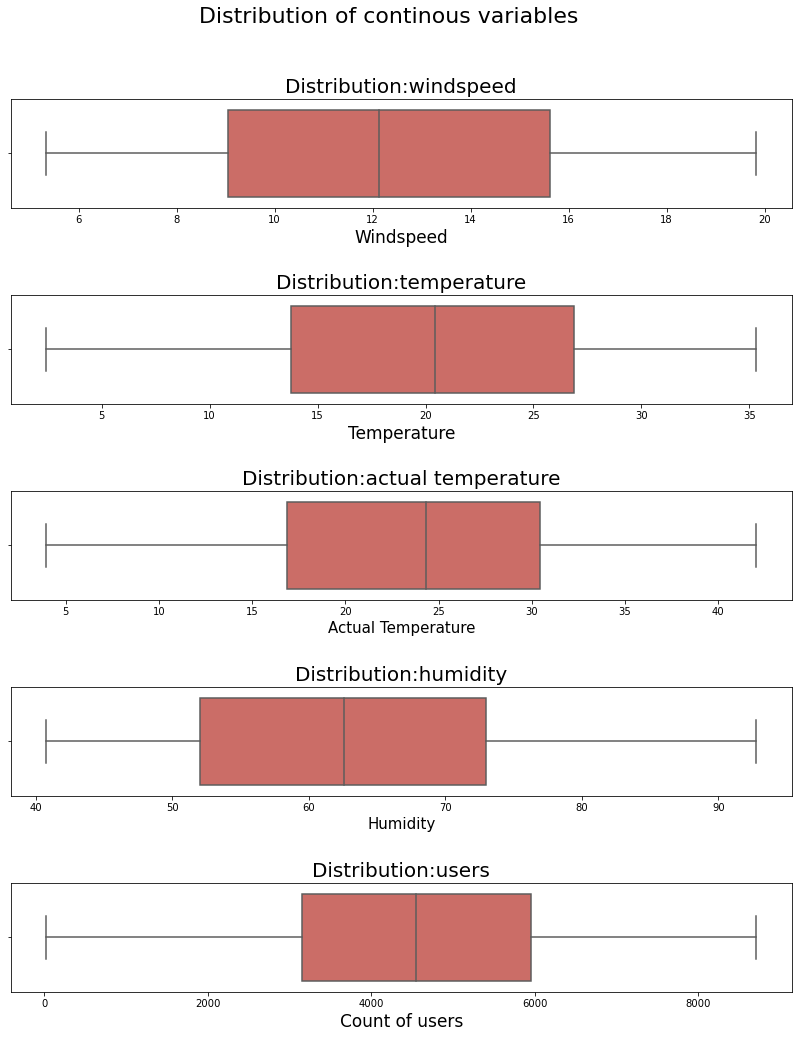

Insight
We have successfully managed the outliers by keeping the distribution of windspeed within
quantile range of 0.05 and 0.90.
Outliers with humidity has been contained within quantile range of 0.05 and 0.99.
Quantile range was selected in view with keeping the skewness close to zero.


In [1260]:
Lower_windspeed=df_bike_sharing['windspeed'].quantile(0.05)
High_windspeed=df_bike_sharing['windspeed'].quantile(0.90)
Lower_humidity=df_bike_sharing['humidity'].quantile(0.05)
High_humidity=df_bike_sharing['humidity'].quantile(0.99)
df_bike_sharing['windspeed'] = np.where(df_bike_sharing['windspeed'] <Lower_windspeed, Lower_windspeed,df_bike_sharing['windspeed'])
df_bike_sharing['windspeed'] =np.where(df_bike_sharing['windspeed'] >High_windspeed, High_windspeed,df_bike_sharing['windspeed'])
df_bike_sharing['humidity'] = np.where(df_bike_sharing['humidity']<Lower_humidity, Lower_humidity,df_bike_sharing['humidity'])
df_bike_sharing['humidity'] = np.where(df_bike_sharing['humidity']>High_humidity, High_humidity,df_bike_sharing['humidity'])
print('Skewness of windspeed is:',df_bike_sharing['windspeed'].skew())
print('Skewness of humidity is:',df_bike_sharing['humidity'].skew())
print('Skewness of temperature_felt is:',df_bike_sharing['temperature_felt'].skew())
print('Skewness of temperature_actual is:',df_bike_sharing['temperature_actual'].skew())
print('Skewness of count_rental_bikes is:',df_bike_sharing['count_rental_bikes'].skew())

#Visualize the presence of the outliers.

plot_countinous_variables()

print('Insight')
print('We have successfully managed the outliers by keeping the distribution of windspeed within\nquantile range of 0.05 and 0.90.')
print('Outliers with humidity has been contained within quantile range of 0.05 and 0.99.')
print('Quantile range was selected in view with keeping the skewness close to zero.')


In [1181]:
#temperature_actual and temperature_felt have very high correlation of 0.99. hence, temperature_felt will be dropped
df_bike_sharing.drop(['temperature_actual','casual','registered',],axis=1,inplace=True)

In [1113]:
df_bike_sharing['weekday_work']=df_bike_sharing['weekday']+['_']+df_bike_sharing['working_day']
df_bike_sharing.drop(['weekday','working_day'],axis=1,inplace=True)

In [1114]:
# Creating Dummy variable for categorical and numerical variables.
df_bike_sharing_dummies = pd.get_dummies(df_bike_sharing, drop_first=True)
df_bike_sharing_dummies.head()

,temperature_felt,humidity,windspeed,count_rental_bikes,season_spring,season_summer,season_winter,year_2019,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,holiday_yes_holiday,weather_condition_Cloudy,weather_condition_Light Rain,weekday_work_Fri_yes_workingday,weekday_work_Mon_not_workingday,weekday_work_Mon_yes_workingday,weekday_work_Sat_not_workingday,weekday_work_Sun_not_workingday,weekday_work_Thu_not_workingday,weekday_work_Thu_yes_workingday,weekday_work_Tue_not_workingday,weekday_work_Tue_yes_workingday,weekday_work_Wed_not_workingday,weekday_work_Wed_yes_workingday
0,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
1,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [1115]:
#Splitting the dataset into Test and Train
# We should specify 'random_state' so that the train and test data set always have the same rows, respectively
#printing the shape of the train and test datasets.
np.random.seed(0)
df_train,df_test= train_test_split(df_bike_sharing_dummies,train_size = 0.70, random_state = 0)
print("df_train ",df_train.shape)
print("df_test ",df_test.shape)


df_train  (511, 33)
df_test  (220, 33)


# RESCALING THE FEATURES

In [1116]:
#Creating an instance : scaler for MinMaxScaler
scaler = MinMaxScaler()

In [1117]:
# Apply scaler to all the continous variables
num_feats=[ 'temperature_felt','count_rental_bikes']
df_train[num_feats]= scaler.fit_transform(df_train[num_feats])
df_train.head()

,temperature_felt,humidity,windspeed,count_rental_bikes,season_spring,season_summer,season_winter,year_2019,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,holiday_yes_holiday,weather_condition_Cloudy,weather_condition_Light Rain,weekday_work_Fri_yes_workingday,weekday_work_Mon_not_workingday,weekday_work_Mon_yes_workingday,weekday_work_Sat_not_workingday,weekday_work_Sun_not_workingday,weekday_work_Thu_not_workingday,weekday_work_Thu_yes_workingday,weekday_work_Tue_not_workingday,weekday_work_Tue_yes_workingday,weekday_work_Wed_not_workingday,weekday_work_Wed_yes_workingday
524,0.755332,43.7083,9.667229,0.904020,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
12,0.071535,47.0417,19.833943,0.162194,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
161,0.796115,65.4583,10.374950,0.579398,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
556,0.757949,63.3333,10.166111,0.734560,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
502,0.621666,52.3333,9.166739,0.862768,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [1118]:
#Splitting the train dataset into Explanatory variables: X_train and Target variable: y_train
y_train=df_train.pop('count_rental_bikes')
X_train=df_train

In [1119]:
#Importing statsmodels
import statsmodels.api as sm

# Add a constant
X_train_all_variables = sm.add_constant(X_train)

# Create a first fitted model
Model_with_all_variables = sm.OLS(y_train, X_train_all_variables).fit()

#View the summary of the regression
Model_with_all_variables.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     count_rental_bikes   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     79.15
Date:                Mon, 13 Dec 2021   Prob (F-statistic):          4.17e-165
Time:                        20:45:40   Log-Likelihood:                 499.91
No. Observations:                 511   AIC:                            -937.8
Df Residuals:                     480   BIC:                            -806.5
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.2675      0.043      6.158      0.000       0.182       0.353
temperature_felt                    0.4392      0.049      9.050      0.000       0.344       0.535
humidity                           -0.0008      0.000     -1.726      0.085      -0.002       0.000
windspeed                          -0.0016      0.001     -1.478      0.140      -0.004       0.001
season_spring                      -0.1356      0.031     -4.316      0.000      -0.197      -0.074
season_summer                      -0.0212      0.026     -0.818      0.414      -0.072       0.030
season_winter                       0.0622      0.030      2.047      0.041       0.002       0.122
year_2019                           0.2309      0.009     26.797      0.000       0.214       0.248
month_Aug                          -0.0101      0.035     -0.292      0.771      -0.078       0.058
month_Dec                          -0.0376      0.036     -1.048      0.295      -0.108       0.033
month_Feb                          -0.0052      0.035     -0.151      0.880      -0.073       0.063
month_Jan                          -0.0169      0.036     -0.472      0.637      -0.087       0.053
month_Jul                          -0.0529      0.036     -1.471      0.142      -0.124       0.018
month_Jun                          -0.0042      0.026     -0.162      0.871      -0.055       0.047
month_Mar                           0.0384      0.027      1.449      0.148      -0.014       0.091
month_May                           0.0419      0.021      1.963      0.050   -4.96e-05       0.084
month_Nov                          -0.0467      0.039     -1.200      0.231      -0.123       0.030
month_Oct                           0.0214      0.038      0.565      0.572      -0.053       0.096
month_Sep                           0.0616      0.033      1.879      0.061      -0.003       0.126
holiday_yes_holiday                 0.0167      0.060      0.277      0.782      -0.102       0.135
weather_condition_Cloudy           -0.0618      0.011     -5.853      0.000      -0.083      -0.041
weather_condition_Light Rain       -0.2678      0.031     -8.742      0.000      -0.328      -0.208
weekday_work_Fri_yes_workingday     0.0543      0.014      3.863      0.000       0.027       0.082
weekday_work_Mon_not_workingday     0.0099      0.073      0.136      0.892      -0.134       0.154
weekday_work_Mon_yes_workingday     0.0110      0.014      0.765      0.445      -0.017       0.039
weekday_work_Sat_not_workingday     0.0448      0.014      3.202      0.001       0.017       0.072
weekday_work_Sun_not_workingday     0.0122      0.014      0.861      0.390      -0.016       0.040
weekday_work_Thu_not_workingday    -0.2964      0.095     -3.130      0.002      -0

# Feature Selection  

In [1120]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [1121]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, step=20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [1122]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temperature_felt', True, 1),
 ('humidity', False, 2),
 ('windspeed', False, 2),
 ('season_spring', True, 1),
 ('season_summer', False, 2),
 ('season_winter', True, 1),
 ('year_2019', True, 1),
 ('month_Aug', False, 2),
 ('month_Dec', True, 1),
 ('month_Feb', False, 2),
 ('month_Jan', False, 2),
 ('month_Jul', True, 1),
 ('month_Jun', False, 2),
 ('month_Mar', True, 1),
 ('month_May', True, 1),
 ('month_Nov', True, 1),
 ('month_Oct', False, 2),
 ('month_Sep', True, 1),
 ('holiday_yes_holiday', False, 2),
 ('weather_condition_Cloudy', True, 1),
 ('weather_condition_Light Rain', True, 1),
 ('weekday_work_Fri_yes_workingday', False, 2),
 ('weekday_work_Mon_not_workingday', False, 2),
 ('weekday_work_Mon_yes_workingday', True, 1),
 ('weekday_work_Sat_not_workingday', False, 2),
 ('weekday_work_Sun_not_workingday', False, 2),
 ('weekday_work_Thu_not_workingday', True, 1),
 ('weekday_work_Thu_yes_workingday', True, 1),
 ('weekday_work_Tue_not_workingday', False, 2),
 ('weekday_work_Tue_yes

In [1123]:
col = X_train.columns[rfe.support_]
col

Index(['temperature_felt', 'season_spring', 'season_winter', 'year_2019',
       'month_Dec', 'month_Jul', 'month_Mar', 'month_May', 'month_Nov',
       'month_Sep', 'weather_condition_Cloudy', 'weather_condition_Light Rain',
       'weekday_work_Mon_yes_workingday', 'weekday_work_Thu_not_workingday',
       'weekday_work_Thu_yes_workingday', 'weekday_work_Wed_not_workingday'],
      dtype='object')

In [1124]:
X_train.columns[~rfe.support_]

Index(['humidity', 'windspeed', 'season_summer', 'month_Aug', 'month_Feb',
       'month_Jan', 'month_Jun', 'month_Oct', 'holiday_yes_holiday',
       'weekday_work_Fri_yes_workingday', 'weekday_work_Mon_not_workingday',
       'weekday_work_Sat_not_workingday', 'weekday_work_Sun_not_workingday',
       'weekday_work_Tue_not_workingday', 'weekday_work_Tue_yes_workingday',
       'weekday_work_Wed_yes_workingday'],
      dtype='object')

In [1125]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Building the Multiple Regression Model 

### VIF Check
We will checking the variance inflation factor before building the model.If the value of the VIF>=5.0 ,
then we will drop the respective variables. Once the VIF of all the remaining variables are less than 5.0, 
then we would check the significance of the individual variable. if the p-value of all remaining variables in 
the model is less than or equal to 0.05, then we have strong evidence to reject the null hyphothesis.We will 
also check the overall fit of the model by examining the F-statistic value and also look at at prob(f) is less than 0.05.


## Model 1

In [1126]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temperature_felt,3.38
2,season_winter,2.57
3,year_2019,2.06
8,month_Nov,1.83
10,weather_condition_Cloudy,1.54
1,season_spring,1.49
4,month_Dec,1.44
5,month_Jul,1.44
7,month_May,1.29
6,month_Mar,1.24


In [1127]:

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model after RFE
model_1 = sm.OLS(y_train, X_train_lm1).fit()
# Print a summary of the linear regression model obtained
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:     count_rental_bikes   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     147.2
Date:                Mon, 13 Dec 2021   Prob (F-statistic):          3.65e-176
Time:                        20:45:43   Log-Likelihood:                 492.06
No. Observations:                 511   AIC:                            -950.1
Df Residuals:                     494   BIC:                            -878.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

## Model 2

- Removing the variable 'Humidity' based on its High VIF

In [1128]:
X_train_model_2 = X_train_rfe.drop(["weekday_work_Wed_not_workingday"], axis = 1)

### VIF Check

In [1129]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_model_2.columns
vif['VIF'] = [variance_inflation_factor(X_train_model_2.values, i) for i in range(X_train_model_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temperature_felt,3.38
2,season_winter,2.57
3,year_2019,2.05
8,month_Nov,1.83
10,weather_condition_Cloudy,1.54
1,season_spring,1.49
4,month_Dec,1.44
5,month_Jul,1.41
7,month_May,1.29
6,month_Mar,1.24


In [1130]:
# Add a constant
X_train_model_2 = sm.add_constant(X_train_model_2)

# Create a first fitted model
model_2 = sm.OLS(y_train, X_train_model_2).fit()

# Print a summary of the linear regression model obtained
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:     count_rental_bikes   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     157.2
Date:                Mon, 13 Dec 2021   Prob (F-statistic):          3.17e-177
Time:                        20:45:44   Log-Likelihood:                 491.95
No. Observations:                 511   AIC:                            -951.9
Df Residuals:                     495   BIC:                            -884.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

## Model 3

 - Removing the variable 'hum' based on its Very High 'VIF' value.
 - Even though the VIF of hum is second highest, we decided to drop 'hum' and not 'temp' based on general knowledge that temperature can be an important factor for a business like bike rentals, and wanted to retain 'temp'.

In [1131]:
#X_train_model_3 = X_train_rfe.drop(['working_day_yes_workingday','weekday_Sat','weekday_Mon','holiday_yes_holiday'], axis = 1)
X_train_model_3 =X_train_rfe.drop(["weekday_work_Wed_not_workingday",'weekday_work_Thu_yes_workingday'], axis = 1)

### VIF Check

In [1132]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_model_3.columns
vif['VIF'] = [variance_inflation_factor(X_train_model_3.values, i) for i in range(X_train_model_3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temperature_felt,3.28
2,season_winter,2.57
3,year_2019,2.05
8,month_Nov,1.83
10,weather_condition_Cloudy,1.54
1,season_spring,1.47
4,month_Dec,1.43
5,month_Jul,1.41
7,month_May,1.29
6,month_Mar,1.24


In [1133]:
# Add a constant
X_train_model_3 = sm.add_constant(X_train_model_3)

# Create a first fitted model
model_3 = sm.OLS(y_train, X_train_model_3).fit()

# Print a summary of the linear regression model obtained
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:     count_rental_bikes   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     167.6
Date:                Mon, 13 Dec 2021   Prob (F-statistic):          1.08e-177
Time:                        20:45:45   Log-Likelihood:                 490.39
No. Observations:                 511   AIC:                            -950.8
Df Residuals:                     496   BIC:                            -887.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

# Final Model Interpretation

## Hypothesis Testing:

Hypothesis testing states that:
- H0:B1=B2=...=Bn=0 
- H1:  at least one  Bi!=0

### lr3 model coefficient values

In [1134]:
model_lm3_coeff=pd.DataFrame(model_3.params,columns=['coefficient_values'])
model_lm3_coeff

,coefficient_values
const,0.216801
temperature_felt,0.454702
season_spring,-0.121900
season_winter,0.089795
year_2019,0.233535
month_Dec,-0.034807
month_Jul,-0.038384
month_Mar,0.042377
month_May,0.032287
month_Nov,-0.052893


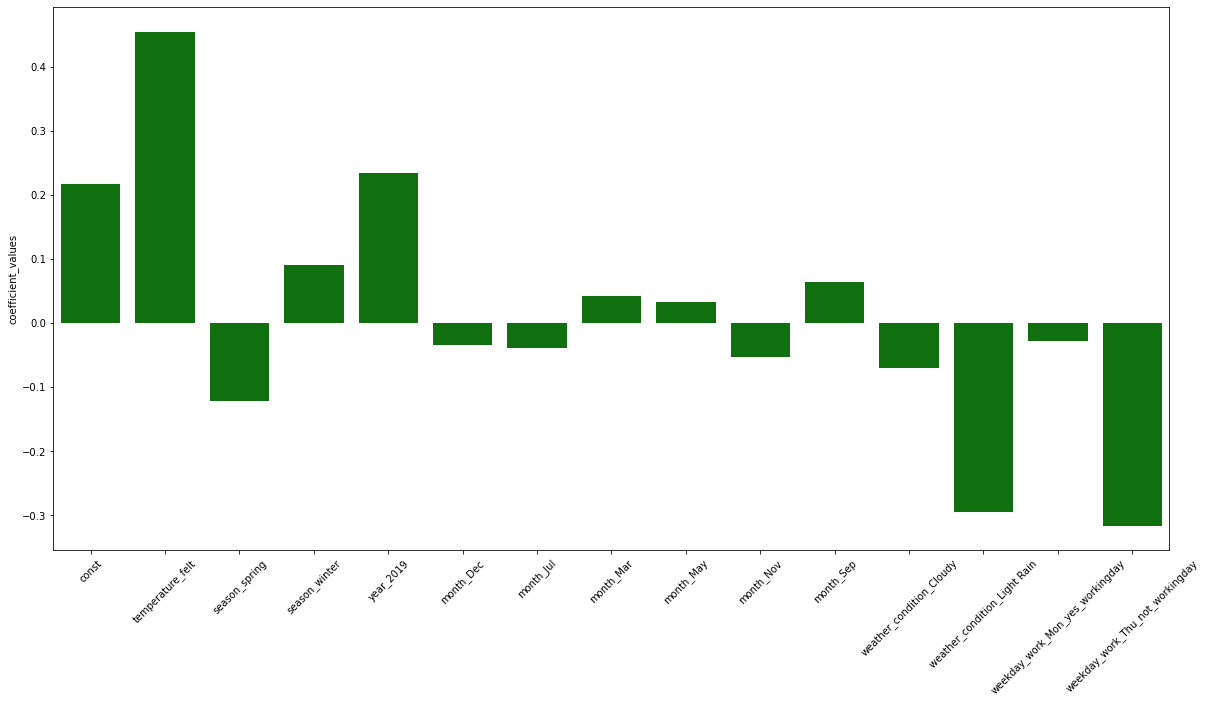

In [1135]:
plt.figure(figsize = (20,10))
#coeff = pd.DataFrame(lr3.coef_, index = X_train_lm3.columns, columns = ['Coefficient'])
sns.barplot(x = model_lm3_coeff.index, y = 'coefficient_values', data =model_lm3_coeff , color = 'green')
plt.xticks(rotation=45)
plt.show()


### Insights
- From the lr6 model summary, it is evident that all our coefficients are not equal to zerowhich means **We REJECT the NULL HYPOTHESIS**
    

### F Statistics

F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.

-F-statistic:                     190.7
-Prob (F-statistic):          2.00e-177

The F-Statistics value of 190.7 and the p-value of '~0.0000' states that the overall model is significant

## The equation of best fitted surface based on model lr6:

cnt = 0.084143 + (**yr** × 0.230846) + (**workingday** × 0.043203) + (**temp** × 0.563615) − (**windspeed** × 0.155191) + (**season2** × 0.082706) + (**season4** ×0.128744) + (**mnth9** × 0.094743) + (**weekday6** ×0.056909) − (**weathersit2** × 0.074807) − (**weathersit3** × 0.306992)



  

## Interpretation of Coefficients:
**temp:** A coefficient value of ‘0.5636’ indicated that a unit increase in temp variable, increases the bike hire numbers by 0.5636 units.

**weathersit_3:** A coefficient value of ‘-0.3070’ indicated that, w.r.t Weathersit1, a unit increase in Weathersit3 variable, decreases the bike hire numbers by 0.3070 units.

**yr:** A coefficient value of ‘0.2308’ indicated that a unit increase in yr variable, increases the bike hire numbers by 0.2308 units.

**season_4:** A coefficient value of ‘0.128744’ indicated that w.r.t season_1, a unit increase in season_4 variable increases the bike hire numbers by 0.128744 units.

**windspeed:** A coefficient value of ‘-0.155191’ indicated that, a unit increase in windspeed variable decreases the bike hire numbers by 0.155191 units.

**workingday:** A coefficient value of ‘0.043203’ indicated that, a unit increase in workingday variable increases the bike hire numbers by 0.043203 units.

**season_2:** A coefficient value of ‘0.082706’ indicated that w.r.t season_1, a unit increase in season_2 variable decreases the bike hire numbers by 0.082706 units.

**mnth_9:** A coefficient value of ‘0.094743’ indicated that w.r.t mnth_1, a unit increase in mnth_9 variable increases the bike hire numbers by 0.094743 units.

**weekday_6:** A coefficient value of ‘0.056909’ indicated that w.r.t weekday_1, a unit increase in weekday_6 variable increases the bike hire numbers by 0.056909 units.

**weathersit_2:** A coefficient value of ‘-0.074807’ indicated that, w.r.t Weathersit1, a unit increase in Weathersit2 variable, decreases the bike hire numbers by 0.074807 units.

**const:** The Constant value of ‘0.084143’ indicated that, in the absence of all other predictor variables (i.e. when x1,x2...xn =0), The bike rental can still increase by 0.084143 units.

# ASSUMPTIONS 

# 1) Linearity
This assumes that there is a linear relationship between the predictors  and the response variable. This also assumes that the predictors are additive.

What it will affect: The predictions will be extremely inaccurate because our model is underfitting. This is a serious violation that should not be ignored.

How to detect it:  by using a scatter plot to see our predicted values versus the actual values. Ideally, the points should lie on or around a diagonal line on the scatter plot.



In [1136]:
model,features,label=model_3,X_train_model_3,y_train

In [1137]:
# Creates predictions on the features with the model and calculates residuals
def calculate_residuals(model, features, label):
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results

Assumption 1: Linear Relationship between the Target and the Features 



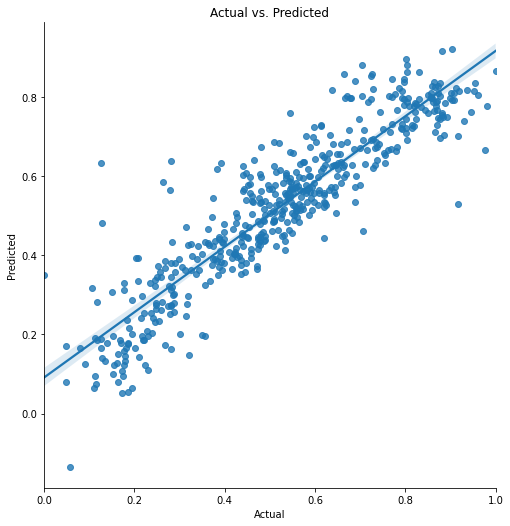

In [1138]:
def linear_assumption(model, features, label):
   
    print('Assumption 1: Linear Relationship between the Target and the Features', '\n')
    
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)
    
    # Plotting the actual vs predicted values
    sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=True, size=7)
   
      
    plt.title('Actual vs. Predicted')
    plt.show()
    
linear_assumption(model,features,label)

# 2) Normality of the Error Terms
More specifically, this assumes that the error terms of the model are normally distributed. Linear regressions other than Ordinary Least Squares (OLS) may also assume normality of the predictors or the label, but that is not the case here.

What it will affect: A violation of this assumption could cause issues with either shrinking or inflating our confidence intervals.

How to detect it: There are a variety of ways to do so, but we’ll look at both a histogram and the p-value from the Anderson-Darling test for normality.



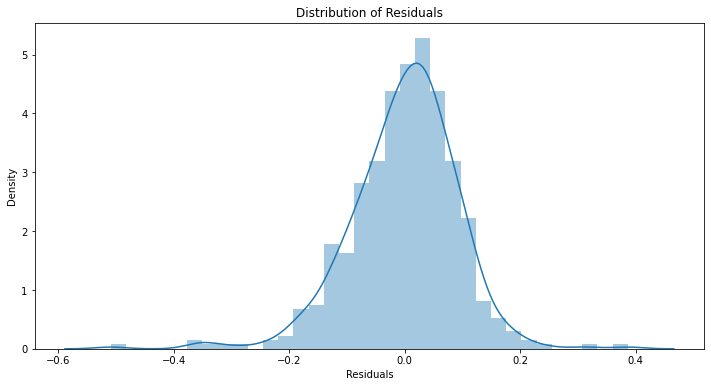

In [1139]:
def normal_errors_assumption(model, features, label):
    
    # Calculating residuals 
    df_results = calculate_residuals(model, features, label)
    
    # Plotting the residuals distribution
    plt.subplots(figsize=(12, 6))
    plt.title('Distribution of Residuals')
    sns.distplot(df_results['Residuals'])
    plt.show()
    
normal_errors_assumption(model,features,label)       

# 3) No Autocorrelation of the Error
This assumes no autocorrelation of the error terms. Autocorrelation being present typically indicates that we are missing some information that should be captured by the model.

What it will affect: This will impact our model estimates.

How to detect it: We will perform a Durbin-Watson test to determine if either positive or negative correlation is present. Alternatively, you could create plots of residual autocorrelations.


In [1140]:
def autocorrelation_assumption(model, features, label):
    
    from statsmodels.stats.stattools import durbin_watson
    print('Assumption 4: No Autocorrelation', '\n')
    
    # Calculating residuals for the Durbin Watson-tests
    df_results = calculate_residuals(model, features, label)

    durbinWatson = durbin_watson(df_results['Residuals'])
    print('Durbin-Watson:', durbinWatson)
    if durbinWatson < 1.5:
        print('Signs of positive autocorrelation', '\n')
        print('Assumption not satisfied')
    elif durbinWatson > 2.5:
        print('Signs of negative autocorrelation', '\n')
        print('Assumption not satisfied')
    else:
        print('Little to no autocorrelation', '\n')
        print('Assumption satisfied')

In [1141]:
autocorrelation_assumption(model,features,label)

Assumption 4: No Autocorrelation 

Durbin-Watson: 1.9226696331857513
Little to no autocorrelation 

Assumption satisfied


# 4) Homoscedasticity
This assumes homoscedasticity, which is the constant variance within our error terms. Heteroscedasticity, the violation of homoscedasticity, occurs when we don’t have an even variance across the error terms.



What it will affect: Significance tests for coefficients due to the standard errors being biased. Additionally, the confidence intervals will be either too wide or too narrow.

How to detect it: Plot the residuals and see if the variance appears to be uniform.



Assumption 5: Homoscedasticity of Error Terms 

Residuals should have relative constant variance


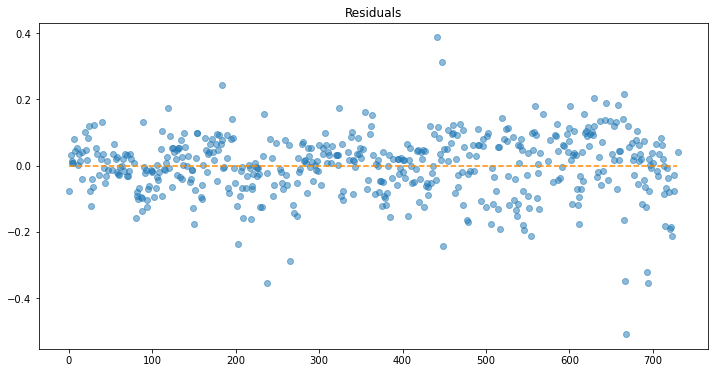

In [1142]:
def homoscedasticity_assumption(model, features, label):
    
    print('Assumption 5: Homoscedasticity of Error Terms', '\n')
    
    print('Residuals should have relative constant variance')
        
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)

    # Plotting the residuals
    plt.subplots(figsize=(12, 6))
    plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
    plt.plot(np.repeat(0, df_results.index.max()), color='darkorange', linestyle='--')
    plt.title('Residuals')
    plt.show() 

homoscedasticity_assumption(model,features,label)

# 5) There is No Multicollinearity between the predictor variables

In [1143]:
def Assumption_No_Multicollinearity():
    # Check for the VIF values of the feature variables. 
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
    #X_train_model_3.drop(['const'],axis=1,inplace=True)
    vif = pd.DataFrame()
    vif['Features'] = X_train_model_3.columns
    vif['VIF'] = [variance_inflation_factor(X_train_model_3.values, i) for i in range(X_train_model_3.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif.iloc[1:,:])

In [1144]:
Assumption_No_Multicollinearity()

                           Features   VIF
1                  temperature_felt  3.05
2                     season_spring  2.79
3                     season_winter  2.34
9                         month_Nov  1.80
5                         month_Dec  1.37
6                         month_Jul  1.33
8                         month_May  1.21
7                         month_Mar  1.15
10                        month_Sep  1.14
11         weather_condition_Cloudy  1.05
12     weather_condition_Light Rain  1.05
14  weekday_work_Thu_not_workingday  1.05
4                         year_2019  1.03
13  weekday_work_Mon_yes_workingday  1.01


## Insight

 - From the VIF calculation we could find that there is no multicollinearity existing between the predictor variables, as all the values are within permissible range of below 5

# MAKING PREDICTION USING FINAL MODEL

Now that we have fitted the model and checked the assumptions, it's time to go ahead and make predictions using the final model (lr6)

### Applying the scaling on the test sets

In [1145]:
df_test_dummies=pd.get_dummies(df_test,drop_first= True)
df_test_dummies.head()

,temperature_felt,humidity,windspeed,count_rental_bikes,season_spring,season_summer,season_winter,year_2019,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,holiday_yes_holiday,weather_condition_Cloudy,weather_condition_Light Rain,weekday_work_Fri_yes_workingday,weekday_work_Mon_not_workingday,weekday_work_Mon_yes_workingday,weekday_work_Sat_not_workingday,weekday_work_Sun_not_workingday,weekday_work_Thu_not_workingday,weekday_work_Thu_yes_workingday,weekday_work_Tue_not_workingday,weekday_work_Tue_yes_workingday,weekday_work_Wed_not_workingday,weekday_work_Wed_yes_workingday
196,31.91315,58.5000,13.958914,5923,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
187,34.34355,65.1250,10.666400,4592,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
14,12.40560,49.8750,10.583521,1248,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
31,11.72650,82.9565,5.334316,1360,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
390,17.80250,76.9583,5.334316,4075,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [1146]:
# Apply scaler() to all the numeric variables
num_feats=[ 'temperature_felt','count_rental_bikes']
#df_test[num_feats]= np.log(df_test_dummies[num_feats])
df_test[num_feats]= scaler.transform(df_test_dummies[num_feats])
df_test.head()

,temperature_felt,humidity,windspeed,count_rental_bikes,season_spring,season_summer,season_winter,year_2019,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,holiday_yes_holiday,weather_condition_Cloudy,weather_condition_Light Rain,weekday_work_Fri_yes_workingday,weekday_work_Mon_not_workingday,weekday_work_Mon_yes_workingday,weekday_work_Sat_not_workingday,weekday_work_Sun_not_workingday,weekday_work_Thu_not_workingday,weekday_work_Thu_yes_workingday,weekday_work_Tue_not_workingday,weekday_work_Tue_yes_workingday,weekday_work_Wed_not_workingday,weekday_work_Wed_yes_workingday
196,0.741444,58.5000,13.958914,0.691550,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
187,0.808256,65.1250,10.666400,0.535568,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
14,0.205177,49.8750,10.583521,0.143677,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
31,0.186509,82.9565,5.334316,0.156803,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
390,0.353539,76.9583,5.334316,0.474979,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [1147]:
y_test=df_test.pop('count_rental_bikes')
X_test=df_test


In [1148]:
X_train_model_3.head()

,const,temperature_felt,season_spring,season_winter,year_2019,month_Dec,month_Jul,month_Mar,month_May,month_Nov,month_Sep,weather_condition_Cloudy,weather_condition_Light Rain,weekday_work_Mon_yes_workingday,weekday_work_Thu_not_workingday
524,1.0,0.755332,0,0,1,0,0,0,0,0,0,0,0,0,0
12,1.0,0.071535,1,0,0,0,0,0,0,0,0,0,0,0,0
161,1.0,0.796115,0,0,0,0,0,0,0,0,0,0,0,0,0
556,1.0,0.757949,0,0,1,0,1,0,0,0,0,1,0,0,0
502,1.0,0.621666,0,0,1,0,0,0,1,0,0,0,0,0,0


In [1149]:
X_train_4_test=X_train_model_3.drop(["const"],axis=1)
X_train_4_test.head()

,temperature_felt,season_spring,season_winter,year_2019,month_Dec,month_Jul,month_Mar,month_May,month_Nov,month_Sep,weather_condition_Cloudy,weather_condition_Light Rain,weekday_work_Mon_yes_workingday,weekday_work_Thu_not_workingday
524,0.755332,0,0,1,0,0,0,0,0,0,0,0,0,0
12,0.071535,1,0,0,0,0,0,0,0,0,0,0,0,0
161,0.796115,0,0,0,0,0,0,0,0,0,0,0,0,0
556,0.757949,0,0,1,0,1,0,0,0,0,1,0,0,0
502,0.621666,0,0,1,0,0,0,1,0,0,0,0,0,0


In [1150]:

col_4_test=X_train_4_test.columns
X_test=X_test[col_4_test]
# Adding constant variable to test dataframe
X_test_model_3 = sm.add_constant(X_test)
X_test_model_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 196 to 235
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   const                            220 non-null    float64
 1   temperature_felt                 220 non-null    float64
 2   season_spring                    220 non-null    uint8  
 3   season_winter                    220 non-null    uint8  
 4   year_2019                        220 non-null    uint8  
 5   month_Dec                        220 non-null    uint8  
 6   month_Jul                        220 non-null    uint8  
 7   month_Mar                        220 non-null    uint8  
 8   month_May                        220 non-null    uint8  
 9   month_Nov                        220 non-null    uint8  
 10  month_Sep                        220 non-null    uint8  
 11  weather_condition_Cloudy         220 non-null    uint8  
 12  weather_condition_Li

In [1151]:
y_train_pred=model_3.predict(X_train_model_3)

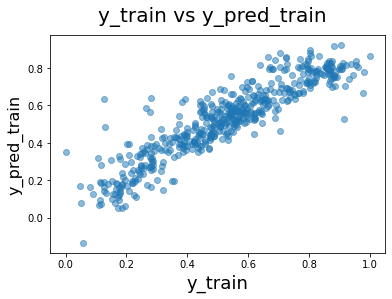

In [1152]:
fig = plt.figure()
plt.scatter(y_train, y_train_pred, alpha=.5)
fig.suptitle('y_train vs y_pred_train', fontsize = 20)              # Plot heading 
plt.xlabel('y_train', fontsize = 18)                          # X-label
plt.ylabel('y_pred_train', fontsize = 16) 
plt.show()

In [1153]:
y_pred_test= model_3.predict(X_test_model_3)

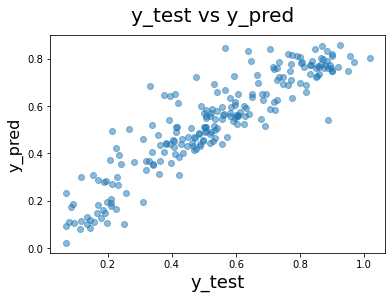

In [1154]:
fig = plt.figure()
plt.scatter(y_test, y_pred_test, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

 # R^2 Value for TEST

In [1155]:
from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred_test)
r2

0.8255357722048636

## Adjusted R^2 Value for TEST

In [1156]:
# Get the shape of X_test
X_test.shape


(220, 14)

In [1157]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.8136211420139763

In [1158]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_train,y_train_pred))
print(mean_squared_error(y_test, y_pred_test))
print(np.sqrt(mean_squared_error(y_train, y_train_pred)))
print(np.sqrt(mean_squared_error(y_test, y_pred_test)))

0.008589614947891613
0.009888923618452738
0.09268017559268872
0.09944306722166578


In [1159]:
from sklearn.metrics import r2_score
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_pred_test))

0.8254649140386237
0.8255357722048636


In [1160]:

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
#define cross-validation method to use
cv = KFold(n_splits=5, random_state=1, shuffle=True)

#build multiple linear regression model
model_cv = LinearRegression()

#use k-fold CV to evaluate model
scores = cross_val_score(model_cv, X_train_model_3, y_train, scoring='r2',
                         cv=cv, n_jobs=-1)
print(scores)

#view mean absolute of accuracy score.
np.mean(np.absolute(scores))



[0.75973386 0.79921557 0.80351407 0.79315528 0.87204279]


0.805532314090199

# Final Result Comparison

- Train R^2 :0.824
- Train Adjusted R^2 :0.821 
- Test R^2 :0.820
- Test Adjusted R^2 :0.812 
- This seems to be a really good model that can very well 'Generalize' various datasets.

# FINAL REPORT

As per our final Model, the top 3 predictor variables that influences the bike booking are: 
- **Temperature (temp)** - A coefficient value of ‘0.5636’ indicated that a unit increase in temp variable increases the bike hire numbers by 0.5636 units. 
- **Weather Situation 3 (weathersit_3)** - A coefficient value of ‘-0.3070’ indicated that, w.r.t Weathersit1, a unit increase in Weathersit3 variable decreases the bike hire numbers by 0.3070 units.
- **Year (yr)** - A coefficient value of ‘0.2308’ indicated that a unit increase in yr variable increases the bike hire numbers by 0.2308 units. 

#### So, it's suggested to consider these variables utmost importance while planning, to achive maximum Booking

The next best features that can also be considered are 
- **season_4:** - A coefficient value of ‘0.128744’ indicated that w.r.t season_1, a unit increase in season_4 variable increases the bike hire numbers by 0.128744 units. 
- **windspeed:** - A coefficient value of ‘-0.155191’ indicated that, a unit increase in windspeed variable decreases the bike hire numbers by 0.155191 units. 

 #### NOTE: 
 - The details of weathersit_1 & weathersit_3 
 - **weathersit_1:** Clear, Few clouds, Partly cloudy, Partly cloudy
 - **weathersit_3:** Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
 
 
 The details of season1 & season4 
 - **season1:** spring 
 - **season4:** winter